# Investigate ML Data Files (numpy) Normalized and non-Normalized

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import time as t
from time import perf_counter as cput

print("Awkward version: "+str(ak.__version__))
print("Uproot version: "+str(ur.__version__))
print("Numpy version: "+str(np.__version__))

Awkward version: 1.5.1
Uproot version: 4.1.8
Numpy version: 1.21.4


## Un-normalized Data

In [3]:
datapath_prefix = '/data/atlas/rbate/'

In [4]:
Eta = np.load(datapath_prefix+'Eta_STMC_v2_25_files.npy', mmap_mode='r')
X = np.load(datapath_prefix+'X_STMC_v2_25_files.npy', mmap_mode='r')
Y = np.load(datapath_prefix+'Y_STMC_v2_25_files.npy', mmap_mode='r')

print(Eta.shape)
print(X.shape)
print(Y.shape)

(257271,)
(257271, 1389, 6)
(257271, 3)


In [6]:
## Use rPerp as the zero mask
nz_mask = X[:,:,3] != 0
t_mask = X[:,:,4] == 1
nzc_mask = np.logical_and(nz_mask, np.invert(t_mask))
nzt_mask = np.logical_and(nz_mask, t_mask)
print(nzt_mask.shape)

(257271, 1389)


### Event Eta

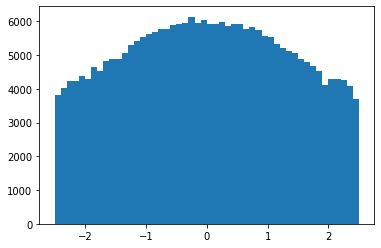

In [7]:
plt.hist(Eta, bins=50)
plt.show()

### Clusters

#### Cluster Cell Energy

In [8]:
emax = np.max(X[nzc_mask,0])
emin = np.min(X[nzc_mask,0])
print('Max cell energy: {}'.format(emax))
print('Min cell energy: {}'.format(emin))

Max cell energy: 1819.1072998046875
Min cell energy: 0.005000010132789612


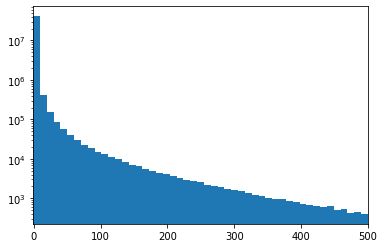

In [9]:
ebins = np.linspace(-1,500,50,endpoint=True)
plt.hist(X[nzc_mask,0], bins=ebins)
plt.xlim(ebins[0], ebins[-1])
plt.yscale('log')
plt.show()

#### Cluster Cell Eta

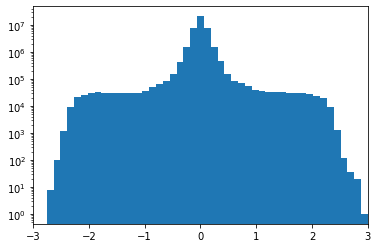

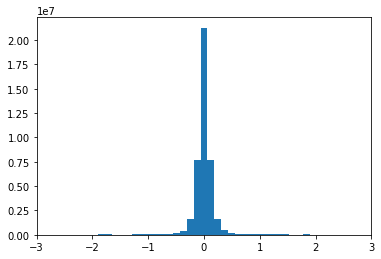

In [10]:
etabins = np.linspace(-3,3,50,endpoint=True)
plt.hist(X[nzc_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
plt.yscale('log')
plt.show()

plt.hist(X[nzc_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
plt.show()

#### Cluster Cell Phi

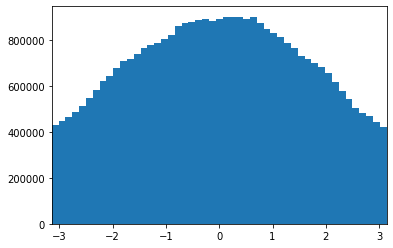

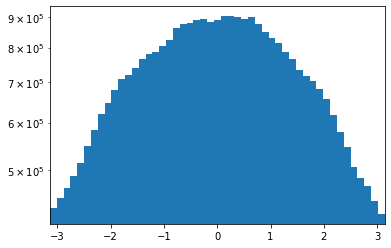

In [11]:
phibins = np.linspace(-np.pi,np.pi,50,endpoint=True)
plt.hist(X[nzc_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
plt.show()

phibins = np.linspace(-np.pi,np.pi,50,endpoint=True)
plt.hist(X[nzc_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
plt.yscale('log')
plt.show()

#### Cluster rPerp

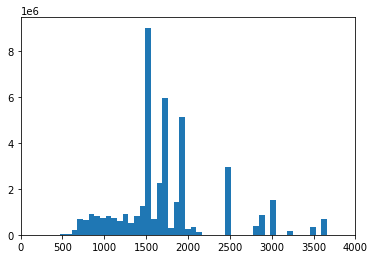

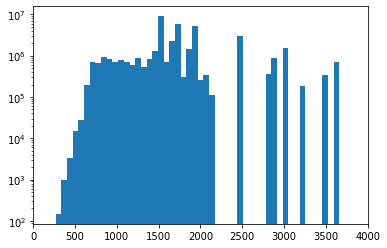

In [12]:
rperpbins = np.linspace(0,4000,60,endpoint=True)
plt.hist(X[nzc_mask,3], bins=rperpbins)
plt.xlim(rperpbins[0], rperpbins[-1])
plt.show()

rperpbins = np.linspace(0,4000,60,endpoint=True)
plt.hist(X[nzc_mask,3], bins=rperpbins)
plt.xlim(rperpbins[0], rperpbins[-1])
plt.yscale('log')
plt.show()

### Tracks

#### Track Projection Number

In [13]:
print(X.shape)
print(nzt_mask.shape)
ntrack = np.sum(X[:,:,4], axis=1)
print('Max number of tracks: {}'.format(np.max(ntrack)))
print(ntrack[:10])

(257271, 1389, 6)
(257271, 1389)
Max number of tracks: 9.0
[6. 6. 7. 7. 7. 6. 6. 7. 6. 7.]


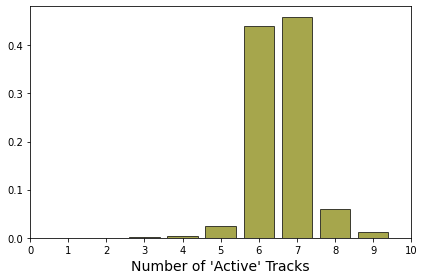

In [14]:
tbins = np.arange(-.5,10.5,1)
plt.hist(ntrack, bins=tbins, edgecolor='black', alpha=.7,
         density=True, rwidth=.8, color='olive')
plt.xlim(0,10)
plt.xticks(ticks=range(11), labels=\
          [str(i) for i in range(11)])
plt.xlabel('Number of \'Active\' Tracks', fontsize=14)
plt.tight_layout()
# plt.savefig('Plots/nTracks_Calo_2022-03-31.png', format='png')
plt.show()

In [15]:
event = 0
np.set_printoptions(suppress=True, precision=3)
for i in range(X.shape[1]):
    print(X[event,i,:])

[ 421.695   -0.004    0.095 3020.       0.      13.   ]
[   7.129   -0.004   -0.003 3020.       0.      13.   ]
[   6.276   -0.004    0.194 3020.       0.      13.   ]
[  13.233   -0.104    0.095 3020.       0.      13.   ]
[   3.034    0.096    0.095 3020.       0.      13.   ]
[   1.784   -0.104   -0.003 3020.       0.      13.   ]
[   0.562    0.096   -0.003 3020.       0.      13.   ]
[   2.427   -0.104    0.194 3020.       0.      13.   ]
[   1.026    0.096    0.194 3020.       0.      13.   ]
[   1.34    -0.004    0.095 2450.       0.      12.   ]
[   0.102   -0.104    0.095 2450.       0.      12.   ]
[  65.981    0.046    0.095 3630.       0.      14.   ]
[   2.044    0.046   -0.003 3630.       0.      14.   ]
[   4.196    0.046    0.194 3630.       0.      14.   ]
[   2.186   -0.154    0.095 3630.       0.      14.   ]
[   0.268    0.246    0.095 3630.       0.      14.   ]
[   0.224   -0.154   -0.003 3630.       0.      14.   ]
[   0.044    0.246   -0.003 3630.       0.      

#### Track P

Maximum trackP: 15427740.0


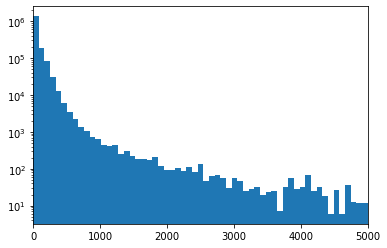

In [16]:
pbins = np.linspace(0,5000,60,endpoint=True)
print('Maximum trackP: {}'.format(np.max(X[nzt_mask,0])))
plt.hist(X[nzt_mask,0], bins=pbins)
plt.xlim(pbins[0], pbins[-1])
plt.yscale('log')
plt.show()

#### Track Eta

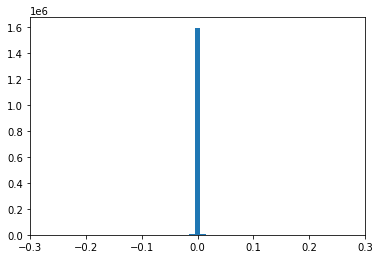

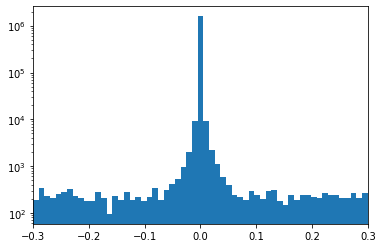

In [17]:
tebins = np.linspace(-.3,.3,60,endpoint=True)

plt.hist(X[nzt_mask,1], bins=tebins)
plt.xlim(tebins[0], tebins[-1])
# plt.yscale('log')
plt.show()

plt.hist(X[nzt_mask,1], bins=tebins)
plt.xlim(tebins[0], tebins[-1])
plt.yscale('log')
plt.show()

#### Track Phi

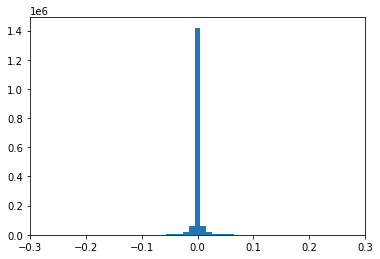

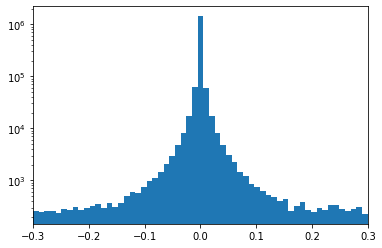

In [18]:
tphbins = np.linspace(-.3,.3,60,endpoint=True)

plt.hist(X[nzt_mask,2], bins=tphbins)
plt.xlim(tphbins[0], tphbins[-1])
# plt.yscale('log')
plt.show()

plt.hist(X[nzt_mask,2], bins=tphbins)
plt.xlim(tphbins[0], tphbins[-1])
plt.yscale('log')
plt.show()

#### Track rPerp

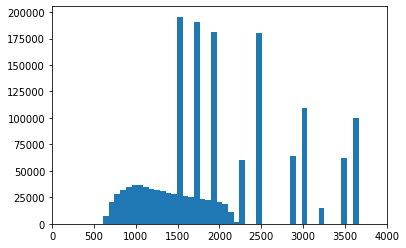

In [19]:
trbins = np.linspace(0,4000,60,endpoint=True)

plt.hist(X[nzt_mask,3], bins=trbins)
plt.xlim(trbins[0], trbins[-1])
# plt.yscale('log')
plt.show()

### Debugging Normalization Script

In [19]:
nz_mask = X[:,:,3] != 0

In [20]:
eta_std = np.std(X[nz_mask,1])
print(eta_std)

0.248319205658227


## Normalized Data

In [20]:
Etan = np.load('/fast_scratch_1/atlas/Eta_STMC_v2_25_norm2.npy')
Xn = np.load('/fast_scratch_1/atlas/X_STMC_v2_25_norm2.npy', mmap_mode='r+')
Yn = np.load('/fast_scratch_1/atlas/Y_STMC_v2_25_norm2.npy', mmap_mode='r+')

print(Etan.shape)
print(Xn.shape)
print(Yn.shape)

(257271,)
(257271, 1389, 5)
(257271,)


In [24]:
nz_mask = Xn[:,:,3] != 0

### Energy

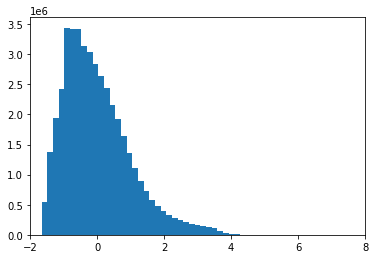

In [25]:
ebins = np.linspace(-2,8,60,endpoint=True)

plt.hist(Xn[nz_mask,0], bins=ebins)
plt.xlim(ebins[0], ebins[-1])
# plt.yscale('log')
plt.show()

### Eta

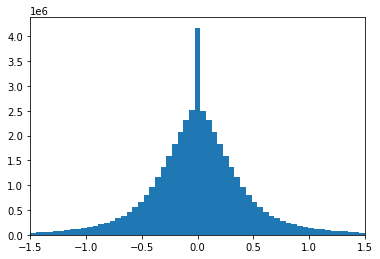

In [26]:
etabins = np.linspace(-1.5,1.5,60,endpoint=True)

plt.hist(Xn[nz_mask,1], bins=etabins)
plt.xlim(etabins[0], etabins[-1])
# plt.yscale('log')
plt.show()

### Phi

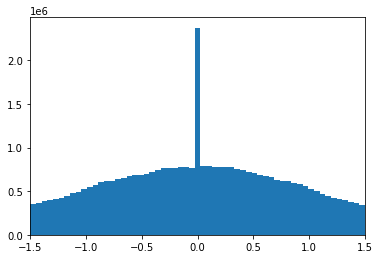

In [27]:
phibins = np.linspace(-1.5,1.5,60,endpoint=True)

plt.hist(Xn[nz_mask,2], bins=phibins)
plt.xlim(phibins[0], phibins[-1])
# plt.yscale('log')
plt.show()

### rPerp

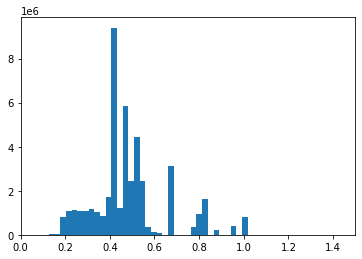

In [28]:
rpbins = np.linspace(0,1.5,60,endpoint=True)

plt.hist(Xn[nz_mask,3], bins=rpbins)
plt.xlim(rpbins[0], rpbins[-1])
# plt.yscale('log')
plt.show()

### Manually Investigate

In [30]:
event = 0
np.set_printoptions(suppress=True, precision=3)
for i in range(Xn.shape[1]):
    print(Xn[event,i,:])

[ 3.355 -0.073 -0.476  0.342  0.   ]
[ 3.031 -0.073 -0.488  0.342  0.   ]
[ 2.008 -0.073 -0.465  0.342  0.   ]
[ 1.    -0.276 -0.476  0.36   0.   ]
[ 2.446  0.13  -0.476  0.324  0.   ]
[ 1.014 -0.276 -0.488  0.36   0.   ]
[ 2.228  0.13  -0.488  0.324  0.   ]
[ 0.858 -0.276 -0.465  0.36   0.   ]
[ 1.712  0.13  -0.465  0.324  0.   ]
[ 1.489 -0.12  -0.476  0.328  0.   ]
[ 3.322 -0.019 -0.476  0.32   0.   ]
[ 3.503  0.026 -0.468  0.353  0.   ]
[ 2.52   0.026 -0.514  0.353  0.   ]
[ 1.913  0.026 -0.423  0.353  0.   ]
[ 2.087 -0.38  -0.468  0.392  0.   ]
[ 2.213  0.431 -0.468  0.319  0.   ]
[ 1.738 -0.38  -0.514  0.392  0.   ]
[ 1.879  0.431 -0.514  0.319  0.   ]
[ 1.054 -0.38  -0.423  0.392  0.   ]
[ 1.575  0.431 -0.423  0.319  0.   ]
[ 3.869  0.022 -0.468  0.386  0.   ]
[ 1.154 -0.073 -0.454  0.342  0.   ]
[ 0.963  0.13  -0.454  0.324  0.   ]
[ 2.801 -0.019 -0.488  0.32   0.   ]
[ 1.668 -0.019 -0.465  0.32   0.   ]
[ 2.564  0.082 -0.476  0.311  0.   ]
[ 1.337 -0.12  -0.488  0.328  0.   ]
[

# Target

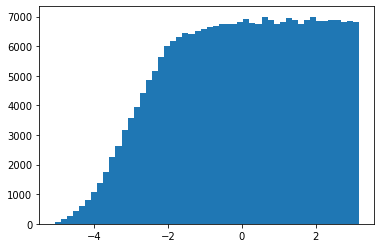

In [32]:
plt.hist(Yn, bins=50)
plt.show()

# Energy Cut of STMC v2 Data Studies

#### Load .npz Files

In [26]:
Energy_files = np.load('/data/atlas/rbate/STMC_v2_Energy_5_files.npz')
print(Energy_files['kwds'])

['STAC' 'STMC']


In [36]:
STAC_E = Energy_files['args'][0]
STMC_E = Energy_files['args'][1]
nSTAC = STAC_E.shape[0]
nSTMC = STMC_E.shape[0]
print('len STAC: {}'.format(nSTAC))
print('len STMC: {}'.format(nSTMC))

len STAC: 48473
len STMC: 48473


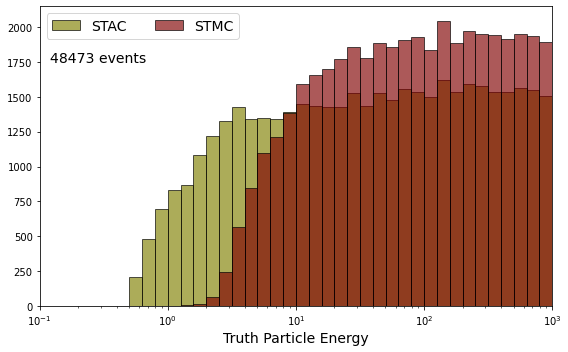

In [47]:
enbins=[10**exp for exp in np.arange(-1.0, 3.1, 0.1)]

fig = plt.figure(figsize=(8,5))
plt.hist(STAC_E, bins=enbins, color='olive', alpha=.65, density=False,
        edgecolor='black', rwidth=1.0, label='STAC')
plt.hist(STMC_E, bins=enbins, color='maroon', alpha=.65, density=False,
        edgecolor='black', rwidth=1.0, label='STMC')
plt.xscale('log')
plt.xlabel('Truth Particle Energy', fontsize=14)
plt.xlim(np.min(enbins), np.max(enbins))
plt.legend(ncol=2, prop={'size':14}, loc='upper left')
plt.text(x=.12, y=1750, s='{} events'.format(nSTAC), fontsize='14')
plt.tight_layout()
# plt.savefig('Plots/STMC_vs_STAC_2022-03-31.png',
            # format='png')
plt.show()

# Cluster Only

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import time as t
from time import perf_counter as cput

print("Awkward version: "+str(ak.__version__))
print("Uproot version: "+str(ur.__version__))
print("Numpy version: "+str(np.__version__))

datapath_prefix = '/data/atlas/rbate/'

Awkward version: 1.5.1
Uproot version: 4.1.8
Numpy version: 1.21.4


In [16]:
Xraw_CLO = np.load(datapath_prefix+'X_CLO_50_files.npy', mmap_mode='r')
Yraw_CLO = np.load(datapath_prefix+'Y_CLO_50_files.npy', mmap_mode='r')

In [17]:
print(Xraw_CLO.shape)

(229050, 945, 4)


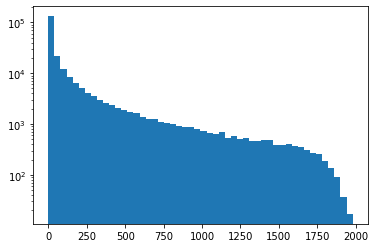

In [21]:
plt.hist(Yraw_CLO, bins=50)
plt.yscale('log')
plt.show()

In [19]:
z_targ_mask = Yraw_CLO == 0
print(np.any(z_targ_mask))

False
